## Packages

In [11]:
import matplotlib.pyplot as plt
from networkx import nx
import numpy as np
import scipy
import math
from random import randint
from numpy.linalg import matrix_power
import scipy.special
import time

## Part 1.1

C:\Users\danie\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


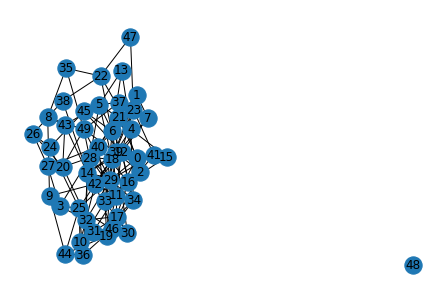

In [2]:
# Generate p-ER random graph
Gp = nx.erdos_renyi_graph(50,0.1) 
nx.draw(Gp, with_labels=True) 
plt.show() 

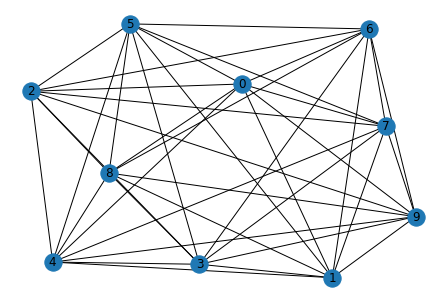

In [3]:
# Generate r-regular random graph
Gr = nx.random_regular_graph(8, 10)
nx.draw(Gr, with_labels=True)
plt.show()

## Part 1.2

In [5]:
# Algebraic method 1 (irreducibility)
def method1(G):
    adj=nx.to_numpy_matrix(G)
    k=len(adj)
    check=np.identity(k)
    for i in range(1,k):
        check+=np.linalg.matrix_power(adj,i)
    if (check>0).all():
        return True
    else:
        return False


In [8]:
# Algebraic method 2 (eigenvalue of the Laplacian matrix)
def method2(G):
    L = nx.laplacian_matrix(G)
    # Convert scipy matrix to numpy array
    L = scipy.sparse.csr_matrix.toarray(L)
    eigv = np.linalg.eigvals(L)
    # Check
    return (np.sort(eigv)[1]>0)


In [9]:
# Breadth-frst search algorithm
def BFS(G):
    # Make a list of all the nodes connected to the staring one in a BFS way.
    l = list(nx.bfs_edges(G, randint(0,len(G)-1)))
    # If l contains all nodes it must have the length of G-1 (the node isn't connected to itself)
    if len(l) == len(G)-1:
        return True
    else:
        return False


## Part 1.3

In [162]:
run_m1_ER=[]
run_m2_ER=[]
run_m3_ER=[]

Since we are dealing with random graphs and their composition changes everytime we generate them, it's better to average the results of the runtime. So for the p-ER graphs we get:

In [171]:
def avg_runtime_m1(p):
    avg=[]
    runtime=[]
    for k in np.arange(50,250,25):
        for i in range(100):
            g=nx.erdos_renyi_graph(k,p)
            start_time =time.perf_counter()
            method1(g)
            stop=time.perf_counter()
            avg+=[stop- start_time]
        runtime+=[np.mean(avg)]
        avg=[]
        print(k)
    return runtime
run_m1_ER=avg_runtime_m1(0.5)

50
75
100
125
150


C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in add
  import sys


175
200
225


In [165]:
def avg_runtime_m2(p):
    avg=[]
    runtime=[]
    for k in np.arange(50,500,25):
        for i in range(100):
            g=nx.erdos_renyi_graph(k,p)
            start_time =time.perf_counter()
            method2(g)
            stop=time.perf_counter()
            avg+=[stop- start_time]
        runtime+=[np.mean(avg)]
        avg=[]
    return runtime
run_m2_ER=avg_runtime_m2(0.5)

In [166]:
def avg_runtime_m3(p):
    avg=[]
    runtime=[]
    for k in np.arange(50,500,25):
        for i in range(100):
            g=nx.erdos_renyi_graph(k,p)
            start_time =time.perf_counter()
            BFS(g)
            stop=time.perf_counter()
            avg+=[stop- start_time]
        runtime+=[np.mean(avg)]
        avg=[]
    return runtime
run_m3_ER=avg_runtime_m3(0.5)

Looking at the plot it's clear that the irreducibility has an higher complexity than the other two methods. The difference between laplacian matrix and BFS is not so significant but BFS seems to be the most efficient one.

Text(0, 0.5, 'run-time in seconds')

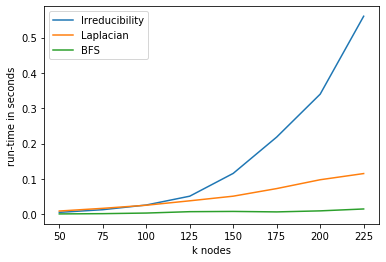

In [179]:
## plotting...
# first of all let's define the number of nodes
nodes=[i for i in range(50,250,25)]
plt.plot(nodes,run_m1_ER,label='Irreducibility')
plt.plot(nodes,run_m2_ER[1:9],label='Laplacian')
plt.plot(nodes,run_m3_ER[1:9],label='BFS')
plt.legend(loc="upper left")
plt.xlabel('k nodes')
plt.ylabel('run-time in seconds')

Doing the same for the r-regular graphs

In [17]:
run_m1_rG=[]
run_m2_rG=[]
run_m3_rG=[]

In [159]:
def avg_runtime_m1_rg():
    avg=[]
    runtime=[]
    for k in np.arange(40,300,20):
        for i in range(30):
            g=nx.random_regular_graph(int(k/2),k)
            start_time = time.perf_counter()
            method1(g)
            stop=time.perf_counter()
            avg+=[stop - start_time]
        runtime+=[np.mean(avg)]
        avg=[]
        print(k)
    return runtime
run_m1_rG=avg_runtime_m1_rg()

40
60
80
100
120
140
160
180
200
220
240


C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


260
280


In [160]:
def avg_runtime_m2_rg():
    avg=[]
    runtime=[]
    for k in np.arange(40,300,20):
        for i in range(30):
            g=nx.random_regular_graph(int(k/2),k)
            start_time =time.perf_counter()
            method2(g)
            stop=time.perf_counter()
            avg+=[stop- start_time]
        runtime+=[np.mean(avg)]
        avg=[]
        print(k)
    return runtime
run_m2_rG=avg_runtime_m2_rg()

40
60
80
100
120
140
160
180
200
220
240
260
280


In [161]:
def avg_runtime_m3_rg():
    avg=[]
    runtime=[]
    for k in np.arange(40,300,20):
        for i in range(30):
            g=nx.random_regular_graph(int(k/2),k)
            start_time = time.perf_counter()
            BFS(g)
            stop=time.perf_counter()
            avg+=[stop- start_time]
        runtime+=[np.mean(avg)]
        avg=[]
        print(k)
    return runtime
run_m3_rG=avg_runtime_m3_rg()

40
60
80
100
120
140
160
180
200
220
240
260
280


As in the previous case, we get the same results: the irreducibility is more complex than the other two methods even when we consider small networks with less than two hundred of nodes

Text(0, 0.5, 'run-time in seconds')

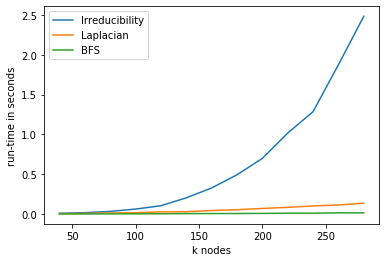

In [163]:
## plotting...
nodes=[i for i in range(40,300,20)]
plt.plot(nodes,run_m1_rG,label='Irreducibility')
plt.plot(nodes,run_m2_rG,label='Laplacian')
plt.plot(nodes,run_m3_rG,label='BFS')
plt.legend(loc="upper left")
plt.xlabel('k nodes')
plt.ylabel('run-time in seconds')

# 1.4

Now we have to check how the probability that a graph is connected changes when the probability to have an arc between 2 nodes increases. Since we are dealing with random graphs we have to consider the fact that, in the case of ER-graphs, the combinations of nodes and arcs changes everytime we generate one. The probability to be connected chenages everytime. So, before simulating we can average this 'probability'. We will use BFS to check connectivity, since the BFS algo seems to be the most efficient of the three criteria. As requested the number of nodes will be fixed to K=100

In [184]:
def check_connect(sim,p):
    prob=0
    for i in range(sim):
        graph=nx.erdos_renyi_graph(100,p)
        if BFS(graph)==True:
            prob+=1
        else:
            prob=prob
    return prob/100

Now we can simulate over different values of p, taking care of the radomness of the graphs.

In [188]:
def simulation(sim):
    prob=[]
    for p in np.arange(0.01,0.99,0.01):
        prob+=[check_connect(sim,p)]
    return prob

Now plotting...

Text(0, 0.5, 'probability G is connected')

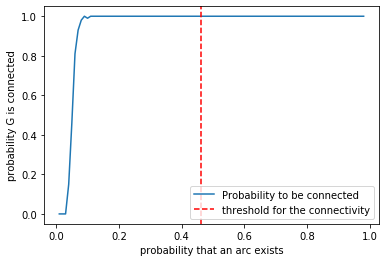

In [198]:
plt.plot(np.arange(0.01,0.99,0.01),simulation(100),label='Probability to be connected')
plt.axvline(x=math.log(100)/math.sqrt(100),color='red',linestyle='dashed',label='threshold for the connectivity')
plt.legend(loc="best")
plt.xlabel('probability that an arc exists')
plt.ylabel('probability G is connected')

We can clearly see from the plot that the probability to be connected grows very fast to 1 when the probability that an arc is added in the graph is low. That's due to the fact that we are considering a graph with 100 nodes. We can easily get different results with k=50. The threshold is get from a statement related to graph's theory of ER-g. It stated that 'if the number of nodes goes to infinity than is it possible to define a threshold that guarantees that the graph is connected; this threshold is $log(n)/sqrt(n)$'. So for n very big we are sure that the graph is connected when p~$ log(n)/sqrt(n)$

Now let's do the same for the r-regular graphs. In this specific case we will check how the probability that a regular graph is connected behave when the number of nodes increas (the graphs considered will have no more than 100 of nodes). As in the previous case we took an average of each probability and then we simulate. 


In [227]:
def check_connect_r(sim,k,r):
    prob=0
    for i in range(sim):
        graph=nx.random_regular_graph(r,k)
        if BFS(graph)==True:
            prob+=1
        else:
            prob=prob
    return prob/100

In [232]:
def simulation_r(sim,r):
    prob=[]
    for k in np.arange(1,101):
        if k<=r:
            prob+=[0]
        else:
            prob+=[check_connect_r(sim,k,r)]
    return prob

simulation for the 2-regular random graph and its plot

Text(0, 0.5, 'probability G is connected')

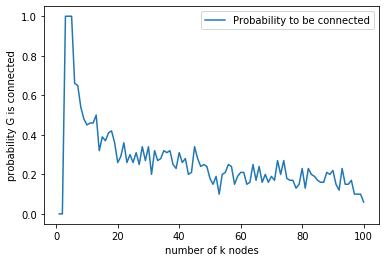

In [234]:
plt.plot(np.arange(1,101),simulation_r(100,2),label='Probability to be connected')
plt.legend(loc="best")
plt.xlabel('number of k nodes')
plt.ylabel('probability G is connected')

unlike the previous cases if we consider r-regular graphs with r=2 the probability decrease when the number of nodes considered is becaming bigger. For big graphs where the nodes can have only 2 neigh is very difficult to be connected. We will see that if we considering greater values of r the situation changes.

Let's consider the case of r=8

Text(0, 0.5, 'probability G is connected')

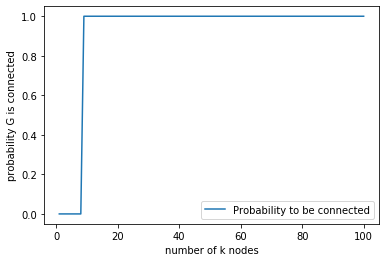

In [236]:
plt.plot(np.arange(1,101),simulation_r(100,8),label='Probability to be connected')
plt.legend(loc="best")
plt.xlabel('number of k nodes')
plt.ylabel('probability G is connected')

In this case the situation is completly different from the previous one. with a value of r equal to 8 the probability that the graph is connected grows up to 1 also with small values of nodes. There's a theorem related to this aspect, it states: 'Given a value of the degreen even and greater than 4, for n that grows to infinity the graph considered is almost surely connected'. That's why we get this results.